$$\textbf {Projet 2: Prédiction de l'attrition de  précieux employés}$$


$$\textbf {El Maghraoui Aymane}$$


L’attrition des employés représente un coût significatif pour les entreprises. Ce projet propose une solution prédictive pour minimiser ce risque. Nous utiliserons des algorithmes d’apprentissage automatique, notamment les arbres de décision et les forêts aléatoires, pour construire des modèles capables d’identifier les employés susceptibles de quitter l’entreprise. Basés sur les données du fichier “donnees projet2.csv”, ces modèles permettront d’anticiper le départ des employés et de mettre en œuvre des actions proactives de rétention des talents.

##### 1. Télècharger la data set

In [143]:
import pandas as pd

df = pd.read_csv("donnees projet2.csv")
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [77]:
df.shape

(1470, 35)

#### Corrélation

In [78]:
corr = df.select_dtypes("number").corr()
corr

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
Age,1.000000,0.010661,-0.001686,0.208034,NaN,-0.010145,0.010146,0.024287,0.029820,0.509604,...,0.053535,NaN,0.037510,0.680381,-0.019621,-0.021490,0.311309,0.212901,0.216513,0.202089
DailyRate,0.010661,1.000000,-0.004985,-0.016806,NaN,-0.050990,0.018355,0.023381,0.046135,0.002966,...,0.007846,NaN,0.042143,0.014515,0.002453,-0.037848,-0.034055,0.009932,-0.033229,-0.026363
DistanceFromHome,-0.001686,-0.004985,1.000000,0.021042,NaN,0.032916,-0.016075,0.031131,0.008783,0.005303,...,0.006557,NaN,0.044872,0.004628,-0.036942,-0.026556,0.009508,0.018845,0.010029,0.014406
Education,0.208034,-0.016806,0.021042,1.000000,NaN,0.042070,-0.027128,0.016775,0.042438,0.101589,...,-0.009118,NaN,0.018422,0.148280,-0.025100,0.009819,0.069114,0.060236,0.054254,0.069065
EmployeeCount,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
EmployeeNumber,-0.010145,-0.050990,0.032916,0.042070,NaN,1.000000,0.017621,0.035179,-0.006888,-0.018519,...,-0.069861,NaN,0.062227,-0.014365,0.023603,0.010309,-0.011240,-0.008416,-0.009019,-0.009197
EnvironmentSatisfaction,0.010146,0.018355,-0.016075,-0.027128,NaN,0.017621,1.000000,-0.049857,-0.008278,0.001212,...,0.007665,NaN,0.003432,-0.002693,-0.019359,0.027627,0.001458,0.018007,0.016194,-0.004999
HourlyRate,0.024287,0.023381,0.031131,0.016775,NaN,0.035179,-0.049857,1.000000,0.042861,-0.027853,...,0.001330,NaN,0.050263,-0.002334,-0.008548,-0.004607,-0.019582,-0.024106,-0.026716,-0.020123
JobInvolvement,0.029820,0.046135,0.008783,0.042438,NaN,-0.006888,-0.008278,0.042861,1.000000,-0.012630,...,0.034297,NaN,0.021523,-0.005533,-0.015338,-0.014617,-0.021355,0.008717,-0.024184,0.025976
JobLevel,0.509604,0.002966,0.005303,0.101589,NaN,-0.018519,0.001212,-0.027853,-0.012630,1.000000,...,0.021642,NaN,0.013984,0.782208,-0.018191,0.037818,0.534739,0.389447,0.353885,0.375281


##### diviser les features aux categorical features et numerical features

In [144]:
categorical = [var for var in df.columns if df[var].dtype == "O"]
numerical = [var for var in df.columns if df[var].dtype != "O"]

print(f"On a {len(categorical)} categorical features :\n")
print(categorical)

On a 9 categorical features :

['Attrition', 'BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole', 'MaritalStatus', 'Over18', 'OverTime']


In [80]:
print(f"On a {len(numerical)} numerical features :\n")
print(numerical)

On a 26 numerical features :

['Age', 'DailyRate', 'DistanceFromHome', 'Education', 'EmployeeCount', 'EmployeeNumber', 'EnvironmentSatisfaction', 'HourlyRate', 'JobInvolvement', 'JobLevel', 'JobSatisfaction', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager']


In [81]:
print(round(df[categorical].describe()),2)

       Attrition BusinessTravel              Department EducationField Gender  \
count       1470           1470                    1470           1470   1470   
unique         2              3                       3              6      2   
top           No  Travel_Rarely  Research & Development  Life Sciences   Male   
freq        1233           1043                     961            606    882   

                JobRole MaritalStatus Over18 OverTime  
count              1470          1470   1470     1470  
unique                9             3      1        2  
top     Sales Executive       Married      Y       No  
freq                326           673   1470     1054   2


In [82]:
print(round(df[numerical].describe()),2)

          Age  DailyRate  DistanceFromHome  Education  EmployeeCount  \
count  1470.0     1470.0            1470.0     1470.0         1470.0   
mean     37.0      802.0               9.0        3.0            1.0   
std       9.0      404.0               8.0        1.0            0.0   
min      18.0      102.0               1.0        1.0            1.0   
25%      30.0      465.0               2.0        2.0            1.0   
50%      36.0      802.0               7.0        3.0            1.0   
75%      43.0     1157.0              14.0        4.0            1.0   
max      60.0     1499.0              29.0        5.0            1.0   

       EmployeeNumber  EnvironmentSatisfaction  HourlyRate  JobInvolvement  \
count          1470.0                   1470.0      1470.0          1470.0   
mean           1025.0                      3.0        66.0             3.0   
std             602.0                      1.0        20.0             1.0   
min               1.0                  

#### Détecter les valeurs manquants

In [83]:
df[numerical].isna().sum()

Age                         0
DailyRate                   0
DistanceFromHome            0
Education                   0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobSatisfaction             0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSinceLastPromotion     0
YearsWithCurrManager        0
dtype: int64

Aucun valeur manquant en les valeurs numériques

In [84]:
df[categorical].isna().sum()

Attrition         0
BusinessTravel    0
Department        0
EducationField    0
Gender            0
JobRole           0
MaritalStatus     0
Over18            0
OverTime          0
dtype: int64

Aucun valeur manquant en les valeurs catégories

In [85]:
duplicates = df.duplicated()
print("Number of duplicates:", duplicates.sum())

Number of duplicates: 0


#### Détection des valeus aberrantes et les traiter

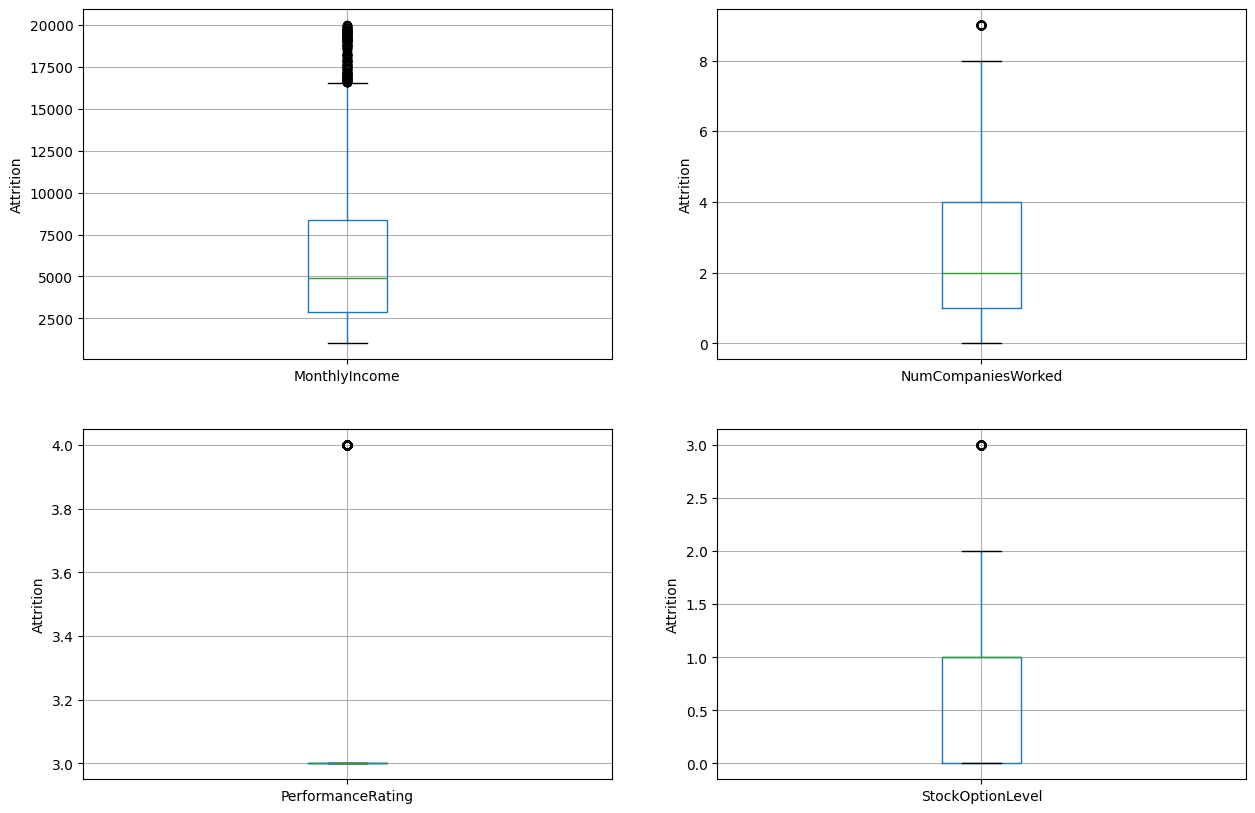

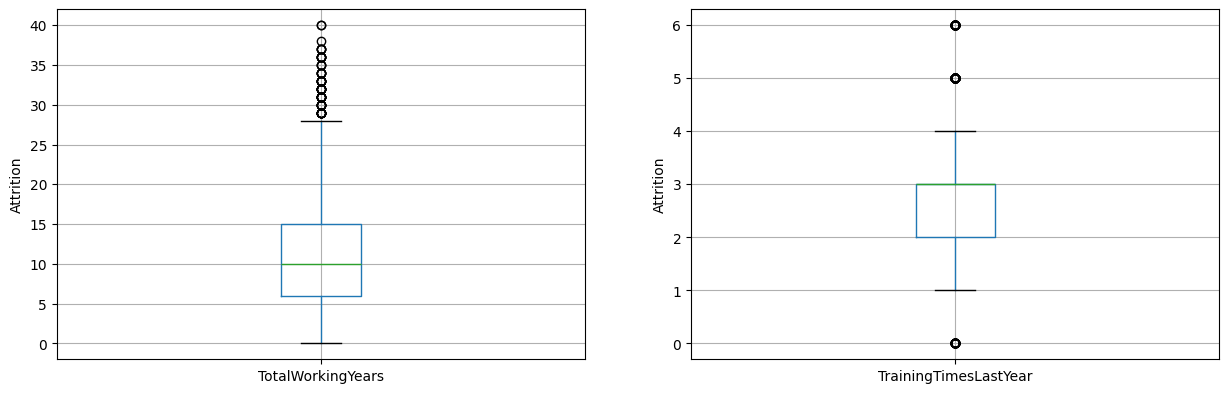

In [128]:
import matplotlib.pyplot as plt

plt.figure(figsize=(15,10))


plt.subplot(2, 2, 1)
fig = df.boxplot(column="MonthlyIncome")
fig.set_ylabel('Attrition')


plt.subplot(2, 2, 2)
fig = df.boxplot(column="NumCompaniesWorked")
fig.set_ylabel('Attrition')

plt.subplot(2, 2, 3)
fig = df.boxplot(column="PerformanceRating")
fig.set_ylabel('Attrition')


plt.subplot(2, 2, 4)
fig = df.boxplot(column="StockOptionLevel")
fig.set_ylabel('Attrition')

plt.show()

plt.figure(figsize=(15,10))

plt.subplot(2, 2, 1)
fig = df.boxplot(column="TotalWorkingYears")
fig.set_ylabel('Attrition')

plt.subplot(2, 2, 2)
fig = df.boxplot(column="TrainingTimesLastYear")
fig.set_ylabel('Attrition')
plt.show()

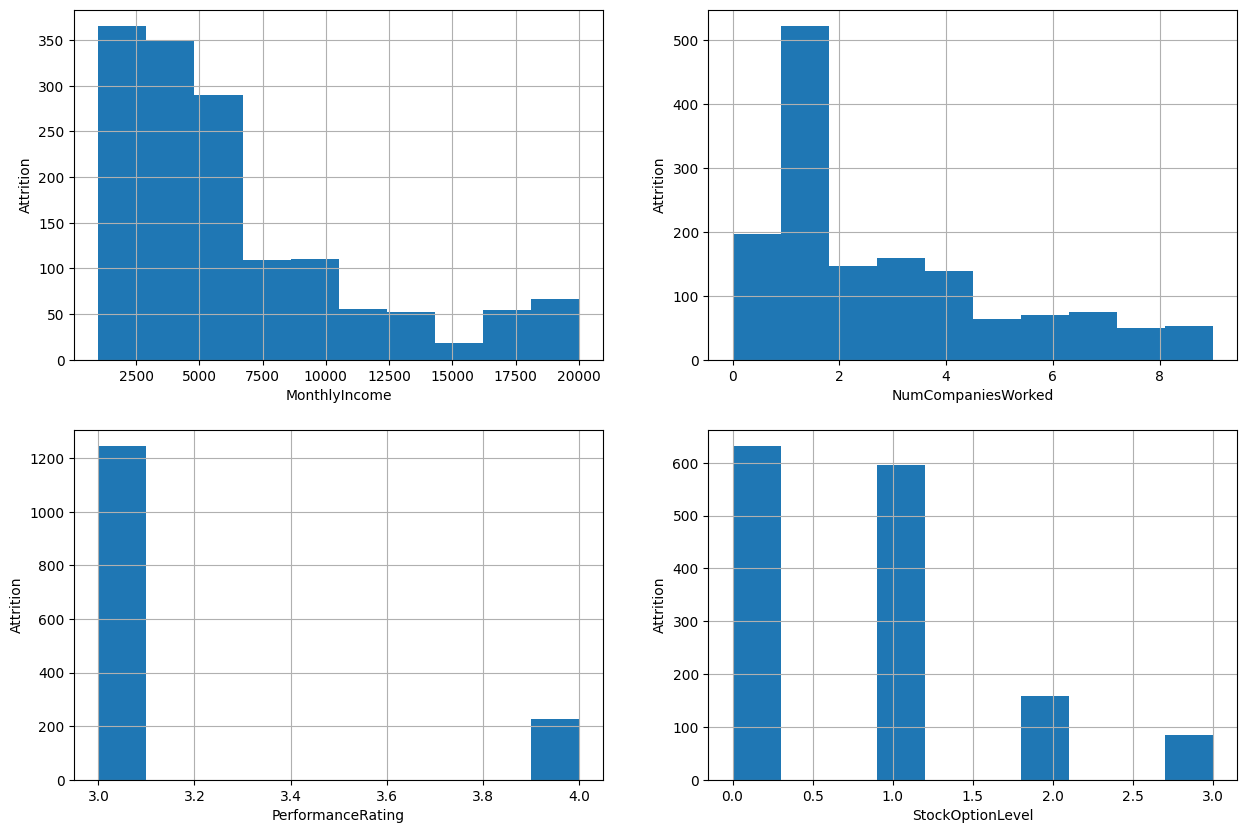

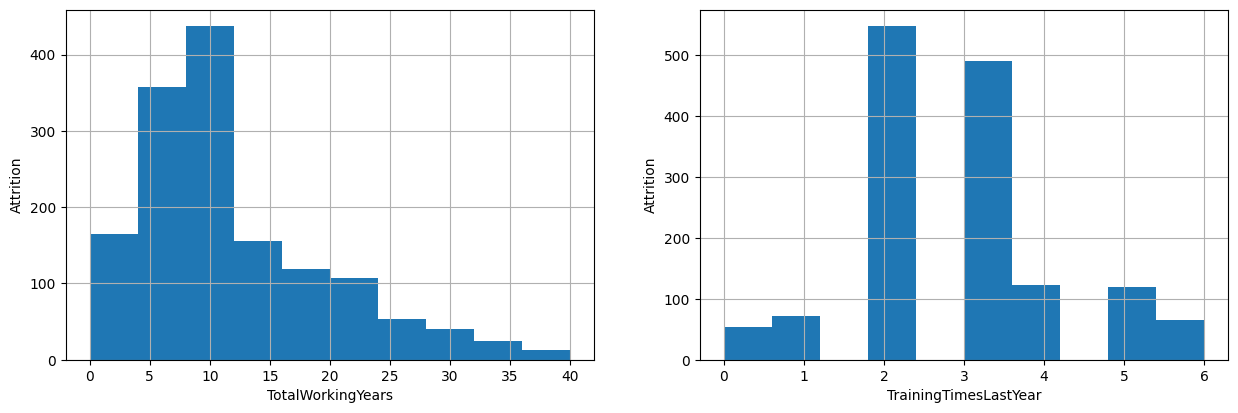

In [129]:
import matplotlib.pyplot as plt

plt.figure(figsize=(15,10))


plt.subplot(2, 2, 1)
fig = df.MonthlyIncome.hist(bins=10)
fig.set_xlabel('MonthlyIncome')
fig.set_ylabel('Attrition')


plt.subplot(2, 2, 2)
fig = df.NumCompaniesWorked.hist(bins=10)
fig.set_xlabel('NumCompaniesWorked')
fig.set_ylabel('Attrition')

plt.subplot(2, 2, 3)
fig = df.PerformanceRating.hist(bins=10)
fig.set_xlabel('PerformanceRating')
fig.set_ylabel('Attrition')


plt.subplot(2, 2, 4)
fig = df.StockOptionLevel.hist(bins=10)
fig.set_xlabel('StockOptionLevel')
fig.set_ylabel('Attrition')

plt.show()

plt.figure(figsize=(15,10))

plt.subplot(2, 2, 1)
fig = df.TotalWorkingYears.hist(bins=10)
fig.set_xlabel('TotalWorkingYears')
fig.set_ylabel('Attrition')

plt.subplot(2, 2, 2)
fig = df.TrainingTimesLastYear.hist(bins=10)
fig.set_xlabel('TrainingTimesLastYear')
fig.set_ylabel('Attrition')
plt.show()

Après la détection des valeurs aberrants, on va utiliser la méthode IQR pour les traiter

IQR = Q3 - Q1 ;
 bornes = [Q1 - 1.5 * IQR, Q3 + 1.5 * IQR] où bornes = [borne inférieur, borne supérieur]

In [145]:
def check_and_handle_outliers(df, numerical):

    print("Vérification des valeurs aberrantes...")
    outliers_present = False
    
    for col in numerical:

        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        
        outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
        
        if len(outliers) > 0:
            outliers_present = True
            print(f"\n Column: {col}")
            print(f"Nombre des valeurs aberrants: {len(outliers)}")
            print(f"Bornes: ({lower_bound:.2f}, {upper_bound:.2f})")
            
            df[col] = df[col].clip(lower=lower_bound, upper=upper_bound)
    
    if not outliers_present:
        print("Aucun valeur abberant a étè trouver!")
    
    return df

df = check_and_handle_outliers(df, numerical)

print("\n Verfication après le traitement...")
check_and_handle_outliers(df, numerical)

Vérification des valeurs aberrantes...

 Column: MonthlyIncome
Nombre des valeurs aberrants: 114
Bornes: (-5291.00, 16581.00)

 Column: NumCompaniesWorked
Nombre des valeurs aberrants: 52
Bornes: (-3.50, 8.50)

 Column: PerformanceRating
Nombre des valeurs aberrants: 226
Bornes: (3.00, 3.00)

 Column: StockOptionLevel
Nombre des valeurs aberrants: 85
Bornes: (-1.50, 2.50)

 Column: TotalWorkingYears
Nombre des valeurs aberrants: 63
Bornes: (-7.50, 28.50)

 Column: TrainingTimesLastYear
Nombre des valeurs aberrants: 238
Bornes: (0.50, 4.50)

 Column: YearsAtCompany
Nombre des valeurs aberrants: 104
Bornes: (-6.00, 18.00)

 Column: YearsInCurrentRole
Nombre des valeurs aberrants: 21
Bornes: (-5.50, 14.50)

 Column: YearsSinceLastPromotion
Nombre des valeurs aberrants: 107
Bornes: (-4.50, 7.50)

 Column: YearsWithCurrManager
Nombre des valeurs aberrants: 14
Bornes: (-5.50, 14.50)

 Verfication après le traitement...
Vérification des valeurs aberrantes...
Aucun valeur abberant a étè trouve

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0.0,8.0,0.5,1,6,4.0,0.0,5.0
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1.0,10.0,3.0,3,10,7.0,1.0,7.0
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0.0,7.0,3.0,3,0,0.0,0.0,0.0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0.0,8.0,3.0,3,8,7.0,3.0,0.0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1.0,6.0,3.0,3,2,2.0,2.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,...,3,80,1.0,17.0,3.0,3,5,2.0,0.0,3.0
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,...,1,80,1.0,9.0,4.5,3,7,7.0,1.0,7.0
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,...,2,80,1.0,6.0,0.5,3,6,2.0,0.0,3.0
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,...,4,80,0.0,17.0,3.0,2,9,6.0,0.0,8.0


### Features Encoding 

On va utiliser LabelEncoder pour encoder les features categorical

In [2]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

for var in categorical:
    df[var] = le.fit_transform(df[var])

df

NameError: name 'categorical' is not defined

In [1]:
X = df.drop("Attrition", axis=1)
y = df["Attrition"]

NameError: name 'df' is not defined

In [89]:
X.shape, y.shape

((1470, 34), (1470,))

Supprimer les features qui ne sont pas nécessaire, on les obtenu après l'entainement du model, à la bas de notre projet

### La création des nouveaux caractéristiques


In [148]:
import pandas as pd

def create_interaction_features(X, features):
    new_features = {}  
    
    for i in range(len(features)):
        new_features[features[i] + '_squared'] = X[features[i]] ** 2
        
        for j in range(i + 1, len(features)):
            feature1 = features[i]
            feature2 = features[j]
            new_features[feature1 + '_x_' + feature2] = X[feature1] * X[feature2]
    
    return pd.concat([X, pd.DataFrame(new_features, index=X.index)], axis=1)

selected_features = X.columns.tolist()
X = create_interaction_features(X, selected_features)
X

,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,...,YearsAtCompany_squared,YearsAtCompany_x_YearsInCurrentRole,YearsAtCompany_x_YearsSinceLastPromotion,YearsAtCompany_x_YearsWithCurrManager,YearsInCurrentRole_squared,YearsInCurrentRole_x_YearsSinceLastPromotion,YearsInCurrentRole_x_YearsWithCurrManager,YearsSinceLastPromotion_squared,YearsSinceLastPromotion_x_YearsWithCurrManager,YearsWithCurrManager_squared
0,41,2,1102,2,1,2,1,1,1,2,...,36,24.0,0.0,30.0,16.0,0.0,20.0,0.0,0.0,25.0
1,49,1,279,1,8,1,1,1,2,3,...,100,70.0,10.0,70.0,49.0,7.0,49.0,1.0,7.0,49.0
2,37,2,1373,1,2,2,4,1,4,4,...,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,33,1,1392,1,3,4,1,1,5,4,...,64,56.0,24.0,0.0,49.0,21.0,0.0,9.0,0.0,0.0
4,27,2,591,1,2,1,3,1,7,1,...,4,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,1,884,1,23,2,3,1,2061,3,...,25,10.0,0.0,15.0,4.0,0.0,6.0,0.0,0.0,9.0
1466,39,2,613,1,6,1,3,1,2062,4,...,49,49.0,7.0,49.0,49.0,7.0,49.0,1.0,7.0,49.0
1467,27,2,155,1,4,3,1,1,2064,2,...,36,12.0,0.0,18.0,4.0,0.0,6.0,0.0,0.0,9.0
1468,49,1,1023,2,2,3,3,1,2065,4,...,81,54.0,0.0,72.0,36.0,0.0,48.0,0.0,0.0,64.0


### Data transformation

On va utiliser StandardScaler pour escalader les données

In [149]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

columns = X.columns
X[columns] = scaler.fit_transform(X[columns])
X[columns]

,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,...,YearsAtCompany_squared,YearsAtCompany_x_YearsInCurrentRole,YearsAtCompany_x_YearsSinceLastPromotion,YearsAtCompany_x_YearsWithCurrManager,YearsInCurrentRole_squared,YearsInCurrentRole_x_YearsSinceLastPromotion,YearsInCurrentRole_x_YearsWithCurrManager,YearsSinceLastPromotion_squared,YearsSinceLastPromotion_x_YearsWithCurrManager,YearsWithCurrManager_squared
0,0.446350,0.590048,0.742527,1.401512,-1.010909,-0.891688,-0.937414,0.0,-1.701283,-0.660531,...,-0.353220,-0.326471,-0.581997,-0.210349,-0.336517,-0.576094,-0.176510,-0.549311,-0.575903,-0.104924
1,1.322365,-0.913194,-1.297775,-0.493817,-0.147150,-1.868426,-0.937414,0.0,-1.699621,0.254625,...,0.338630,0.482943,-0.291167,0.502493,0.438025,-0.264295,0.632740,-0.493455,-0.251273,0.489587
2,0.008343,0.590048,1.414363,-0.493817,-0.887515,-0.891688,1.316673,0.0,-1.696298,1.169781,...,-0.742385,-0.748773,-0.581997,-0.744980,-0.712052,-0.576094,-0.734613,-0.549311,-0.575903,-0.724207
3,-0.429664,-0.913194,1.461466,-0.493817,-0.764121,1.061787,-0.937414,0.0,-1.694636,1.169781,...,-0.050536,0.236600,0.115996,-0.744980,0.438025,0.359304,-0.734613,-0.046613,-0.575903,-0.724207
4,-1.086676,0.590048,-0.524295,-0.493817,-0.887515,-1.868426,0.565311,0.0,-1.691313,-1.575686,...,-0.699145,-0.678390,-0.465665,-0.673696,-0.618168,-0.397923,-0.622992,-0.325889,-0.390400,-0.625122
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,-0.101159,-0.913194,0.202082,-0.493817,1.703764,-0.891688,0.565311,0.0,1.721670,0.254625,...,-0.472132,-0.572814,-0.581997,-0.477665,-0.618168,-0.576094,-0.567182,-0.549311,-0.575903,-0.501265
1466,0.227347,0.590048,-0.469754,-0.493817,-0.393938,-1.868426,0.565311,0.0,1.723332,1.169781,...,-0.212688,0.113428,-0.378416,0.128251,0.438025,-0.264295,0.632740,-0.493455,-0.251273,0.489587
1467,-1.086676,0.590048,-1.605183,-0.493817,-0.640727,0.085049,-0.937414,0.0,1.726655,-0.660531,...,-0.353220,-0.537622,-0.581997,-0.424202,-0.618168,-0.576094,-0.567182,-0.549311,-0.575903,-0.501265
1468,1.322365,-0.913194,0.546677,1.401512,-0.887515,0.085049,0.565311,0.0,1.728317,1.169781,...,0.133237,0.201408,-0.581997,0.538135,0.132902,-0.576094,0.604835,-0.549311,-0.575903,0.861157


Détecter et gérer les valeurs aberrantes après features engineering

In [150]:
columns = X.columns
X = check_and_handle_outliers(X, columns)

print("\n Verfication après le traitement...")
check_and_handle_outliers(X, columns)

Vérification des valeurs aberrantes...

 Column: StockOptionLevel
Nombre des valeurs aberrants: 85
Bornes: (-2.90, 2.22)

 Column: Age_squared
Nombre des valeurs aberrants: 29
Bornes: (-2.75, 2.55)

 Column: Age_x_DailyRate
Nombre des valeurs aberrants: 6
Bornes: (-3.01, 2.89)

 Column: Age_x_Department
Nombre des valeurs aberrants: 52
Bornes: (-2.34, 2.22)

 Column: Age_x_DistanceFromHome
Nombre des valeurs aberrants: 67
Bornes: (-2.61, 2.24)

 Column: Age_x_Education
Nombre des valeurs aberrants: 13
Bornes: (-2.62, 2.54)

 Column: Age_x_EducationField
Nombre des valeurs aberrants: 23
Bornes: (-3.06, 2.83)

 Column: Age_x_EmployeeNumber
Nombre des valeurs aberrants: 3
Bornes: (-3.18, 3.04)

 Column: Age_x_HourlyRate
Nombre des valeurs aberrants: 8
Bornes: (-2.94, 2.79)

 Column: Age_x_JobInvolvement
Nombre des valeurs aberrants: 16
Bornes: (-2.68, 2.60)

 Column: Age_x_JobLevel
Nombre des valeurs aberrants: 99
Bornes: (-2.51, 2.07)

 Column: Age_x_MaritalStatus
Nombre des valeurs aber

,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,...,YearsAtCompany_squared,YearsAtCompany_x_YearsInCurrentRole,YearsAtCompany_x_YearsSinceLastPromotion,YearsAtCompany_x_YearsWithCurrManager,YearsInCurrentRole_squared,YearsInCurrentRole_x_YearsSinceLastPromotion,YearsInCurrentRole_x_YearsWithCurrManager,YearsSinceLastPromotion_squared,YearsSinceLastPromotion_x_YearsWithCurrManager,YearsWithCurrManager_squared
0,0.446350,0.590048,0.742527,1.401512,-1.010909,-0.891688,-0.937414,0.0,-1.701283,-0.660531,...,-0.353220,-0.326471,-0.581997,-0.210349,-0.336517,-0.576094,-0.176510,-0.549311,-0.575903,-0.104924
1,1.322365,-0.913194,-1.297775,-0.493817,-0.147150,-1.868426,-0.937414,0.0,-1.699621,0.254625,...,0.338630,0.482943,-0.291167,0.502493,0.438025,-0.264295,0.632740,-0.493455,-0.251273,0.489587
2,0.008343,0.590048,1.414363,-0.493817,-0.887515,-0.891688,1.316673,0.0,-1.696298,1.169781,...,-0.742385,-0.748773,-0.581997,-0.744980,-0.712052,-0.576094,-0.734613,-0.549311,-0.575903,-0.724207
3,-0.429664,-0.913194,1.461466,-0.493817,-0.764121,1.061787,-0.937414,0.0,-1.694636,1.169781,...,-0.050536,0.236600,0.115996,-0.744980,0.438025,0.359304,-0.734613,-0.046613,-0.575903,-0.724207
4,-1.086676,0.590048,-0.524295,-0.493817,-0.887515,-1.868426,0.565311,0.0,-1.691313,-1.575686,...,-0.699145,-0.678390,-0.465665,-0.673696,-0.618168,-0.397923,-0.622992,-0.325889,-0.390400,-0.625122
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,-0.101159,-0.913194,0.202082,-0.493817,1.703764,-0.891688,0.565311,0.0,1.721670,0.254625,...,-0.472132,-0.572814,-0.581997,-0.477665,-0.618168,-0.576094,-0.567182,-0.549311,-0.575903,-0.501265
1466,0.227347,0.590048,-0.469754,-0.493817,-0.393938,-1.868426,0.565311,0.0,1.723332,1.169781,...,-0.212688,0.113428,-0.378416,0.128251,0.438025,-0.264295,0.632740,-0.493455,-0.251273,0.489587
1467,-1.086676,0.590048,-1.605183,-0.493817,-0.640727,0.085049,-0.937414,0.0,1.726655,-0.660531,...,-0.353220,-0.537622,-0.581997,-0.424202,-0.618168,-0.576094,-0.567182,-0.549311,-0.575903,-0.501265
1468,1.322365,-0.913194,0.546677,1.401512,-0.887515,0.085049,0.565311,0.0,1.728317,1.169781,...,0.133237,0.201408,-0.581997,0.538135,0.132902,-0.576094,0.604835,-0.549311,-0.575903,0.861157


On va diviser data set à des données d'entrainements et de test

In [158]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=45, stratify=y)

#### L'implémentation du model basé sur un arbre de décision

In [161]:
from sklearn import tree
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import precision_score, recall_score, f1_score

model = tree.DecisionTreeClassifier(random_state=42)

param_grid = {
    'max_depth': [None, 10, 20, 30, 40, 50, 100],
    'min_samples_split': [2, 5, 10, 20, 50],  
    'min_samples_leaf': [1, 2, 3, 4, 5, 8, 16],
    'max_features': ['sqrt', 'log2'],
    'criterion': ['gini', 'entropy'],
    'class_weight': [None, 'balanced'] 
}

random_search = RandomizedSearchCV(estimator=model, 
                                 param_distributions=param_grid,
                                 n_iter=10, 
                                 cv=5,
                                 scoring='accuracy',
                                 n_jobs=2, 
                                 random_state=42)

random_search.fit(X_train, y_train)

best_model = random_search.best_estimator_
y_predict = best_model.predict(X_test)

print("Best Hyperparameters:", random_search.best_params_)
print("Best Accuracy:", random_search.best_score_)
print("Precision:", precision_score(y_test, y_predict, average='weighted'))
print("Recall:", recall_score(y_test, y_predict, average='weighted'))
print("F1-score:", f1_score(y_test, y_predict, average='weighted'))

Best Hyperparameters: {'min_samples_split': 5, 'min_samples_leaf': 4, 'max_features': 'log2', 'max_depth': 10, 'criterion': 'gini', 'class_weight': None}
Best Accuracy: 0.8140065816536405
Precision: 0.7564134837741399
Recall: 0.7961956521739131
F1-score: 0.77276457654883


<Axes: >

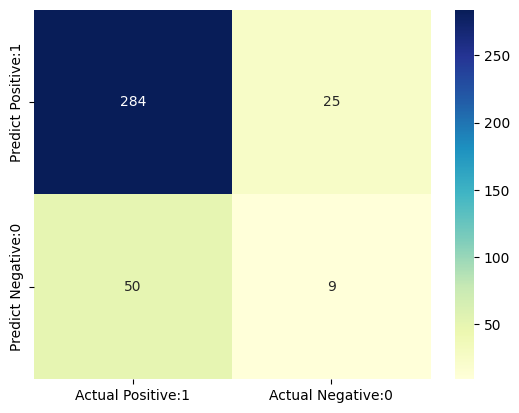

In [162]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

cm = confusion_matrix(y_test, y_predict)
cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive:1', 'Actual Negative:0'], 
                                 index=['Predict Positive:1', 'Predict Negative:0'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')

#### L'implémentation du model basé sur la foret aléatoire

In [159]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import  precision_score, recall_score, f1_score

param_grid = {
    'n_estimators': [100, 200, 300, 500],
    'max_depth': [None, 10, 20, 30, 40, 50],
    'min_samples_split': [2, 5, 10, 20, 50],
    'min_samples_leaf': [1, 2, 4, 8, 16],
    'max_features': ['sqrt', 'log2'],
    'criterion': ['gini', 'entropy'],
    'class_weight': ['balanced', 'balanced_subsample']
}


rf_classifier = RandomForestClassifier(random_state=42)
random_search = RandomizedSearchCV(estimator=rf_classifier, 
                                   param_distributions=param_grid,
                                    n_iter=10, 
                                    cv=5,
                                    scoring = "accuracy",
                                    n_jobs=2, 
                                    random_state=42)


random_search.fit(X_train, y_train)

best_rf = random_search.best_estimator_
best_params = random_search.best_params_

y_predict = best_rf.predict(X_test)

print("Best Hyperparameters:", random_search.best_params_)
print("Best Accuracy:", random_search.best_score_)
print("Precision:", precision_score(y_test, y_predict, average='weighted'))
print("Recall:", recall_score(y_test, y_predict, average='weighted'))
print("F1-score:", f1_score(y_test, y_predict, average='weighted'))

Best Hyperparameters: {'n_estimators': 100, 'min_samples_split': 20, 'min_samples_leaf': 8, 'max_features': 'log2', 'max_depth': None, 'criterion': 'entropy', 'class_weight': 'balanced_subsample'}
Best Accuracy: 0.8647799259563966
Precision: 0.845889945652174
Recall: 0.8559782608695652
F1-score: 0.8498346058609701


<Axes: >

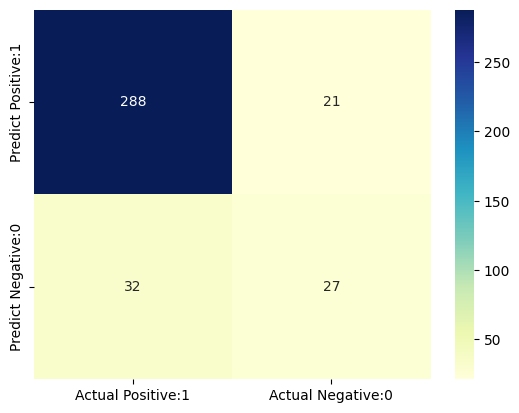

In [160]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

cm = confusion_matrix(y_test, y_predict)
cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive:1', 'Actual Negative:0'], 
                                 index=['Predict Positive:1', 'Predict Negative:0'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')